In [100]:
import pandas as pd
import mc_processor
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import visualizing

import importlib
# importlib.reload(mc_processor)
importlib.reload(visualizing)

%matplotlib inline
%config InlineBackend.figure_format = 'png'



In [10]:
## toggle

# survey_year = input("What year is the survey you want to analyze from? (2022, 2023, or 2024)")
survey_year = str(2024)

In [93]:
# read results files

clarifier = "field2/rvoter/"
# clarifier = ""

codebook = pd.read_csv(os.path.join(survey_year,f'raw/levels_codebook.csv'), encoding='utf-8')
data = pd.read_csv(os.path.join(survey_year,f'raw/{clarifier}data.csv'), encoding='utf-8')
q_codebook = pd.read_csv(os.path.join(survey_year,f'raw/question_codebook.csv'), encoding='utf-8', index_col = 'qid')

# q_codebook into dict
q_codebook = q_codebook.to_dict().get('qidFull')

In [12]:
data

ResponseID  xdemAll  demZIP  BPC1_1  BPC1_2  BPC1_3  BPC1_4  \
0     R_7IawucEjaAD7m62        1   62871       4       3       4       4   
1     R_5PvmPKlU3zhT6Ip        1   15323       3       3       4       4   
2     R_1eqzVWAs7yktAfp        1   92704       1       2       1       1   
3     R_1X769eF9N081ixj        1   33322       4       4       4       4   
4     R_7jYF6R06Sd5szrH        1   63146       3       1       1       4   
...                 ...      ...     ...     ...     ...     ...     ...   
1886  R_555BybHMU7BfCJr        1   89048       5       5       4       4   
1887  R_1PUCqvYHMvY3wyn        1   83338       5       5       5       5   
1888  R_7NbIJ4hk5SloPYJ        1   98335       1       1       1       1   
1889  R_5Jt8VHzd7itmogS        1   13903       1       1       1       1   
1890  R_7ypCC3YixUrPQDu        1   91770       4       3       2       2   

      BPC1_5  BPC2_1NET  BPC2_2NET  ...  demLGBTQ1  xdemMarried  BPCxdem1  \
0          4          1          2  ...          1            2         1   
1          4          2          2  ...          1            2         1   
2          1          2          2  ...          1            2         2   
3          4          2          1  ...          1            2         2   
4          3          2          2  ...          1            2         1   
...      ...        ...        ...  ...        ...          ...       ...   
1886       4          1          2  ...          1            1         2   
1887       5          2          2  ...          1            2         2   
1888       1          2          2  ...          1            2         2   
1889       1          2          2  ...          1            2         2   
1890       4          2          2  ...          1            2         2   

      BPCxdem2  BPCxdem3  BPCxdem4  BPCxdem5  county_fips  demGender  \
0            2         2         1       1.0      17059.0        2.0   
1            2         2         1       2.0      42125.0        2.0   
2            2         2         1       NaN       6059.0        2.0   
3            2         2         1       2.0      12011.0        1.0   
4            2         2         1       NaN      29189.0        2.0   
...        ...       ...       ...       ...          ...        ...   
1886         2         2         4       1.0      32023.0        1.0   
1887         2         2         4       NaN      16053.0        1.0   
1888         2         2         1       NaN      53053.0        2.0   
1889         2         2         3       NaN      36007.0        1.0   
1890         2         2         1       2.0       6037.0        1.0   

               wts  
0     7.442290e-02  
1     2.820813e-01  
2     2.105119e+00  
3     6.565325e-01  
4     2.388342e+00  
...            ...  
1886  5.652475e+00  
1887  1.734594e-07  
1888  1.561952e+00  
1889  2.470559e-01  
1890  2.100268e+00  

[1891 rows x 219 columns]

In [13]:
nulldata = pd.DataFrame(data.isnull().sum(),columns=["Sum_Null"]) ##2204 rows in 2024
nulldata.sort_values(by=["Sum_Null"],ascending=False,inplace=True)

# nulldata[nulldata["Sum_Null"]>0].head(20)

Use `get_percents` to get percent who selected each option, works for questions that have multiple or single selection.

Demo input optional. For all demo categories, see next cell.

In [14]:
# all demo categories
for key in q_codebook:
    if "dem" in key:
        print(key)

xdemAll
demZIP
xdemGender
demAgeGeneration
xdemIdeo3
xdemInc3
xdemWhite
xdemHispBin
demBlackBin
demRaceOther
xdemReligion
xdemReligOther
xdemEvang
xdemUsr
xdemEmploy
xdemMilHH1
xdemBidenApprove
xdemBidenApprove2
demInsured
demInsType
demUnion
demLGBTQ1
xdemMarried
BPCxdem1
BPCxdem2
BPCxdem3
BPCxdem4
BPCxdem5
demGender3
demRVoter


In [15]:
# NOT NECESARRY W NEW DATA

## FILTER DATA BY REGISTERED VOTER
# print(len(data))
# data = data[data["demRVoter"]==1]
# print(len(data))

In [102]:
##
mc_processor.run_and_display(data,codebook,q_codebook,"BPC17",demo="xpid3",survey_year=survey_year,suppress_output=True)

PID: Dem (no lean)                        \
                       Social media platforms Your state government   
Far too little                       0.270281              0.100301   
Too little                           0.255689              0.311405   
About the right amount               0.296349              0.399727   
Too much                             0.072320              0.057188   
Far too much                         0.040733              0.030517   
Don't know/ No opinion               0.064629              0.100862   

                                                            \
                       Federal government Local government   
Far too little                   0.117469         0.092892   
Too little                       0.316584         0.287992   
About the right amount           0.376225         0.408759   
Too much                         0.047978         0.064231   
Far too much                     0.056283         0.029107   
Don't know/ No opinion           0.085461         0.117019   

                           PID: Ind (no lean)                        \
                       Social media platforms Your state government   
Far too little                       0.218243              0.092169   
Too little                           0.281739              0.292219   
About the right amount               0.218144              0.391435   
Too much                             0.109571              0.046676   
Far too much                         0.059244              0.050865   
Don't know/ No opinion               0.113059              0.126635   

                                                            \
                       Federal government Local government   
Far too little                   0.118440         0.079751   
Too little                       0.319297         0.249805   
About the right amount           0.283184         0.408516   
Too much                         0.111250         0.071546   
Far too much                     0.043217         0.040451   
Don't know/ No opinion           0.124612         0.149932   

                           PID: Rep (no lean)                        \
                       Social media platforms Your state government   
Far too little                       0.260345              0.123545   
Too little                           0.239069              0.286176   
About the right amount               0.258706              0.372470   
Too much                             0.088147              0.056270   
Far too much                         0.070419              0.049854   
Don't know/ No opinion               0.083314              0.111685   

                                                            
                       Federal government Local government  
Far too little                   0.157398         0.117241  
Too little                       0.283246         0.253705  
About the right amount           0.299556         0.390038  
Too much                         0.073526         0.072084  
Far too much                     0.082870         0.041733  
Don't know/ No opinion           0.103404         0.125199

In [66]:
## CONFIDENCE RATES

confidence_keys = {20:"Your vote",21:"Votes in your local community",22:"Votes in your state",23:"Votes across the country"}

dfs = {}

for i in range(20, 24):
    df = mc_processor.get_confidence_results(data, codebook, q_codebook, question_number=i, demo='xpid3', suppress_output=True)
    dfs[confidence_keys[i]] = df


In [67]:
demo_confidence = []
for q in dfs:
    df = dfs[q].T
    demo_confidence.append(pd.DataFrame(df[["Very confident","Somewhat confident"]].sum(axis=1),columns=[q]))

demo_confidence = pd.concat(demo_confidence,axis=1)
    

In [75]:
demo_confidence =demo_confidence.T
demo_confidence.map(lambda x: f"{x:.1%}")

PID: Dem (no lean) PID: Ind (no lean)  \
Your vote                                  88.4%              76.0%   
Votes in your local community              89.9%              79.1%   
Votes in your state                        87.6%              74.8%   
Votes across the country                   85.5%              64.9%   

                              PID: Rep (no lean) overall  
Your vote                                  72.0%   79.6%  
Votes in your local community              75.9%   82.3%  
Votes in your state                        70.7%   78.5%  
Votes across the country                   61.1%   71.9%

In [80]:
# bpc colors
bpc_blue = '#3C608A'
bpc_lightgray = '#d3d8d6'
bpc_darkgray = '#333638'
bpc_red = '#e43e47'
bpc_lightblue = '#3687e7'
bpc_lightyellow = '#f6fbc2'
bpc_lightpurple = '#ddafec'
bpc_pink='#f87fab'
bpc_orange='#eec044'

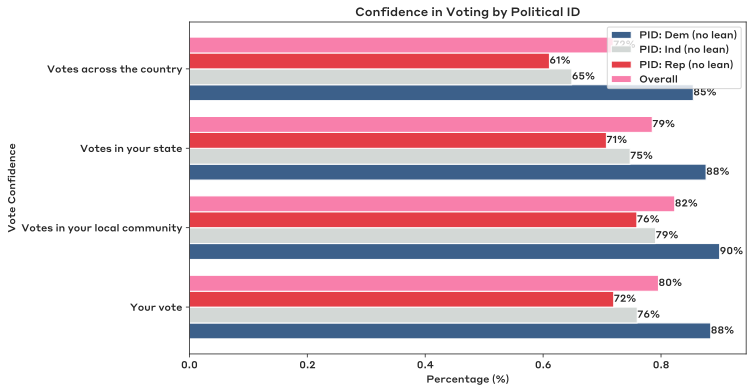

In [88]:
# Function to add data labels to bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width * 100:.0f}%', ha='left', va='center')

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions for each bar
bar_height = 0.2
index = np.arange(len(demo_confidence))

# Plot each group of bars
bar1 = ax.barh(index - bar_height * 1.5, demo_confidence['PID: Dem (no lean)'], bar_height, label='PID: Dem (no lean)', color=bpc_blue)
bar2 = ax.barh(index - bar_height / 2, demo_confidence['PID: Ind (no lean)'], bar_height, label='PID: Ind (no lean)', color=bpc_lightgray)
bar3 = ax.barh(index + bar_height / 2, demo_confidence['PID: Rep (no lean)'], bar_height, label='PID: Rep (no lean)', color=bpc_red)
bar4 = ax.barh(index + bar_height * 1.5, demo_confidence['overall'], bar_height, label='Overall', color=bpc_pink)

# Call the function for each set of bars
add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

# Add labels and title
ax.set_ylabel('Vote Confidence')
ax.set_xlabel('Percentage (%)')
ax.set_title('Confidence in Voting by Political ID')
ax.set_yticks(index)
ax.set_yticklabels(demo_confidence.index)

# Add a legend
ax.legend()

# Display the plot
plt.savefig("confidence_xpid.png")
plt.show()

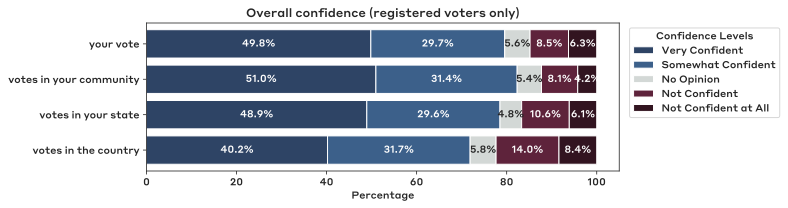

In [64]:
## OVERALL CONFIDENCE RATES

demo = None
question_number = 20

dfs = []
cols = []
for i in range(20,24):
    dfs.append(mc_processor.get_confidence_results(data,codebook,q_codebook,i,demo=None,suppress_output=True))#.map(lambda x: f"{x:.1%}"))
    cols.append(q_codebook[f"BPC{i}a"])

confidence = pd.concat(dfs, axis=1)
confidence.columns = cols
# confidence
visualizing.plot_overall_confidence(confidence)


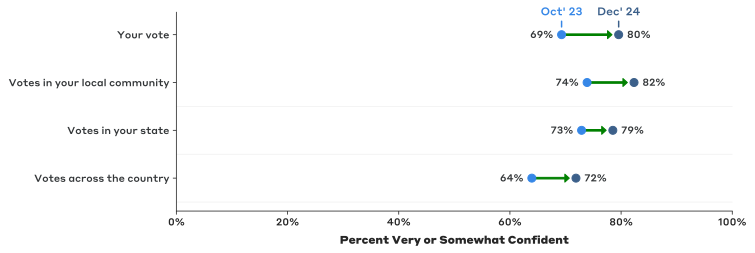

In [65]:
## DOT PLOT

confidence2024 = confidence
confidence2023 = pd.read_csv("2023/confidence.csv",index_col=0)

# cols
confidence2023.columns = list(confidence_keys.values())
confidence2024.columns = list(confidence_keys.values())


confidence_23_24 = []
dfs= [confidence2023,confidence2024]
years  = ["2023","2024"]
for i in range(2):
    df = dfs[i].T
    df[years[i]] = df[["Very confident","Somewhat confident"]].sum(axis=1)
    df = df[[years[i]]]
    confidence_23_24.append(df)

confidence_23_24 = pd.concat(confidence_23_24,axis=1)

visualizing.dotplot(confidence_23_24,"confidence",start_tick_title = "Oct' 23", end_tick_title = "Dec' 24",xlabel='Percent Very or Somewhat Confident')


In [89]:
confidence_23_24.to_csv("confidence_23_24.csv")

In [9]:
## TO ASK FOR CONFIDENCE QUESTIONS

#split sample a - regular order
#split sample b - reverse order
#split sample c - random order

sample_dict = {"a":"regular order","b":"reverse order","c":"random order"}

all_dfs = []

for i in range(20,24):
    # store dfs for each sample
    q_dfs = []    
    for split_sample in ["a","b","c"]:
        question = "BPC"+str(i)+split_sample
    
        # get results for question by sample
        df = mc_processor.run_and_display(data,codebook,q_codebook,question,survey_year,demo=None,suppress_output=True)
        df.columns = [f"{sample_dict[split_sample]}"]
        q_dfs.append(df)
    
    # print(q_codebook[question]) # defaults to split sample c, but tested with other a/b/c combos and got same result (they rotated question order but didn't change question #)
    

    q_df = pd.concat(q_dfs, axis=1)

    q_df["deviation"] = q_df.std(axis=1)

    ## display df with formatted percents
    # display(q_df.iloc[:,0:3].map(lambda x: f"{x:.1%}"))

    all_dfs.append(q_df)

# visualizing.plot_split_sample(all_dfs, q_codebook)

In [10]:
# get n for split samples
for sample in ["a","b","c"]:
    # for q in range(20,24):
    q = 20
    print(data[[f"BPC{q}{sample}"]].count())

BPC20a    629
dtype: int64
BPC20b    648
dtype: int64
BPC20c    614
dtype: int64


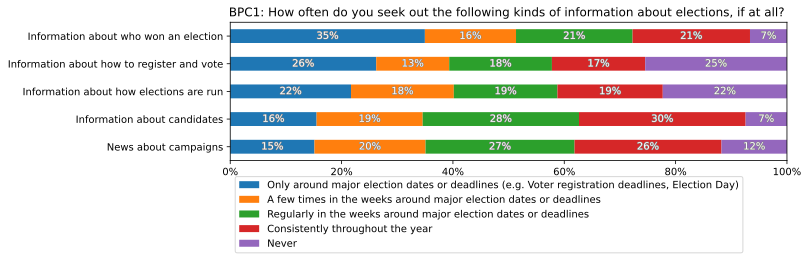

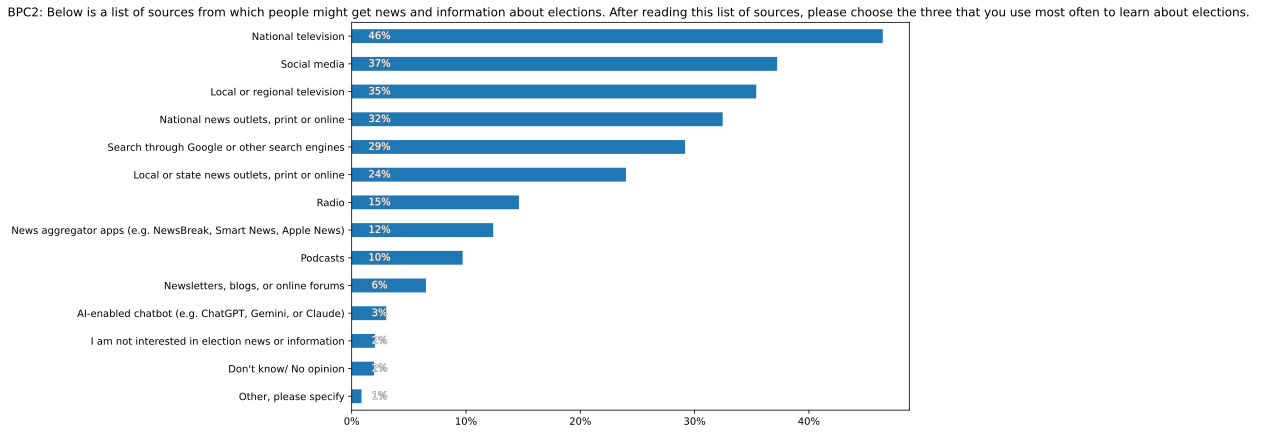

In [11]:
# TO ASK MOST QUESTIONS FOR 2024
demo = None

questions = [f"BPC{i}" for i in range(1, 3)]

for question in questions:
     df = mc_processor.run_and_display(data,codebook,q_codebook,question,survey_year,demo,suppress_output=False)

In the United States, there is information voters need to register and vote. Where are you most likely to look for this information? Please select up to three.   \
A federal agency or website dedicated to electi...                                              23.2%                                                                                                                 
A national political party organization                                                         10.4%                                                                                                                 
Civic or religious organizations in your community                                               7.2%                                                                                                                 
Don't know/ No opinion                                                                           8.9%                                                                                                                 
Elected officials at any level (e.g. mayors, go...                                               9.0%                                                                                                                 
Election-related organizations (including integ...                                              15.0%                                                                                                                 
Fact-checking organizations (e.g. Snopes, Polit...                                               8.2%                                                                                                                 
Friends and family                                                                              24.1%                                                                                                                 
Local or county administrators                                                                  27.2%                                                                                                                 
News media professionals (local/national TV new...                                              19.3%                                                                                                                 
Other, please specify                                                                            2.0%                                                                                                                 
State election administrators                                                                   19.3%                                                                                                                 
Your favorite commentator or analyst from a rad...                                               8.8%                                                                                                                 
Your favorite social media influencer or conten...                                              10.5%                                                                                                                 
Your preferred candidate                                                                        14.0%                                                                                                                 

                                                   If you wanted to know more about how elections are run in the United States, where would you be most likely look for that information? Please select up to three.   \
A federal agency or website dedicated to electi...                                              32.7%                                                                                                                   
A national political party organization                                                         11.0%                                                                           

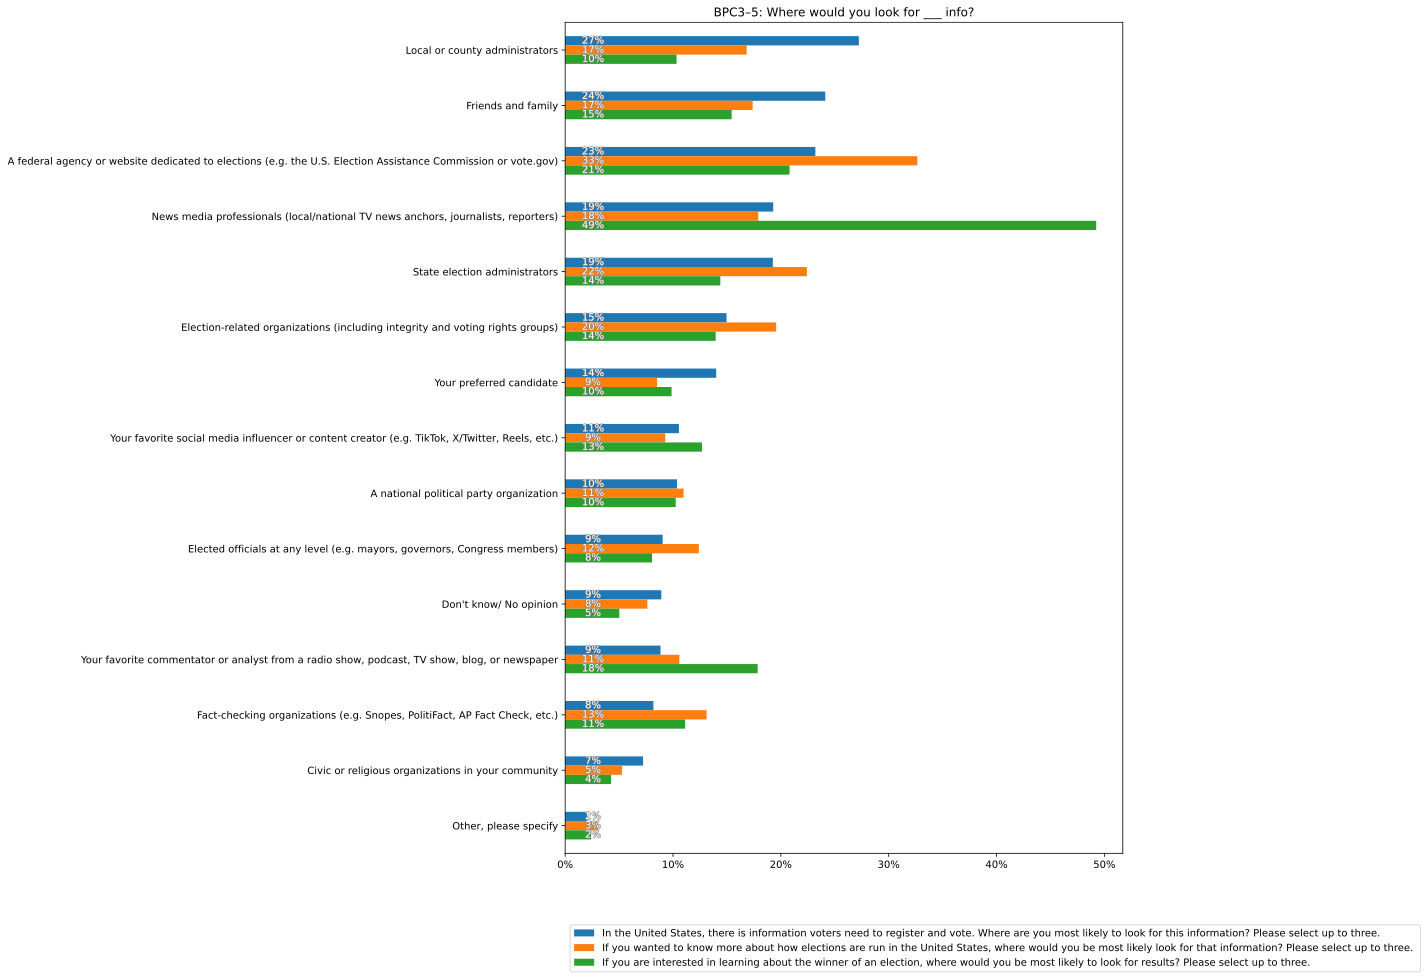

In [12]:
questions = [f"BPC{j}" for j in range(3, 6)]

final_df = mc_processor.get_parallel_questions(data, codebook, q_codebook, questions, survey_year)
display(final_df.map(lambda x: f"{x:.1%}"))
ax = visualizing.plot_question(final_df, 'BPC3–5', 'Where would you look for ___ info?')

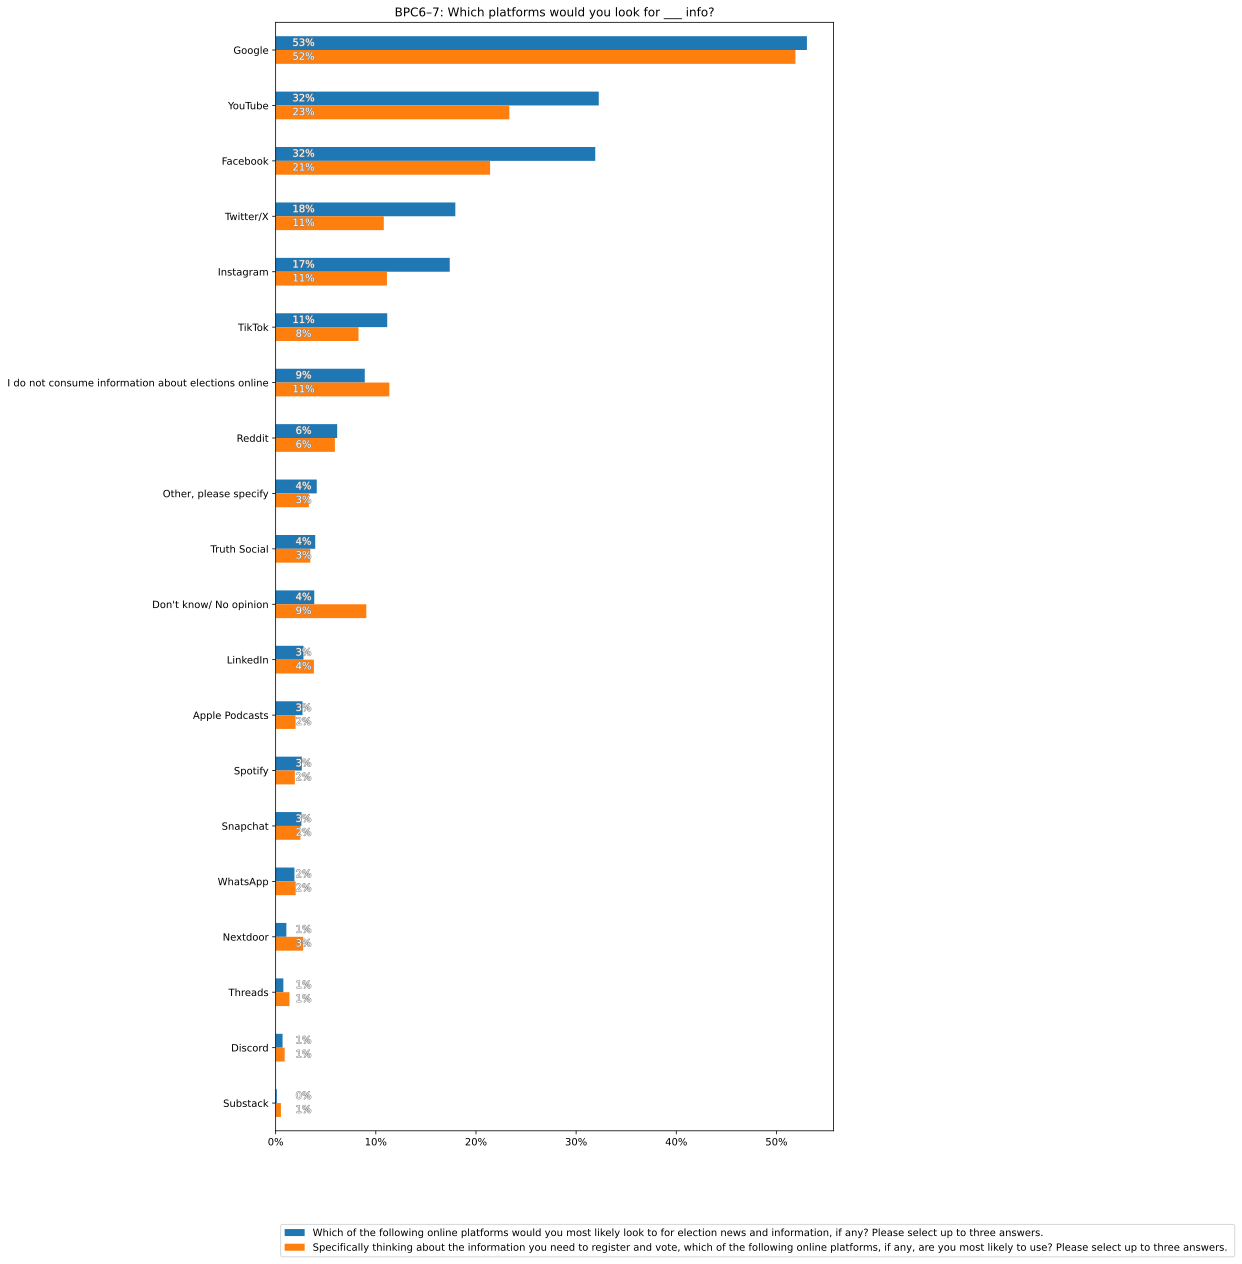

In [13]:
questions = [f"BPC{j}" for j in range(6, 8)]

final_df = mc_processor.get_parallel_questions(data, codebook, q_codebook, questions, survey_year)

ax = visualizing.plot_question(final_df, 'BPC6–7', 'Which platforms would you look for ___ info?')

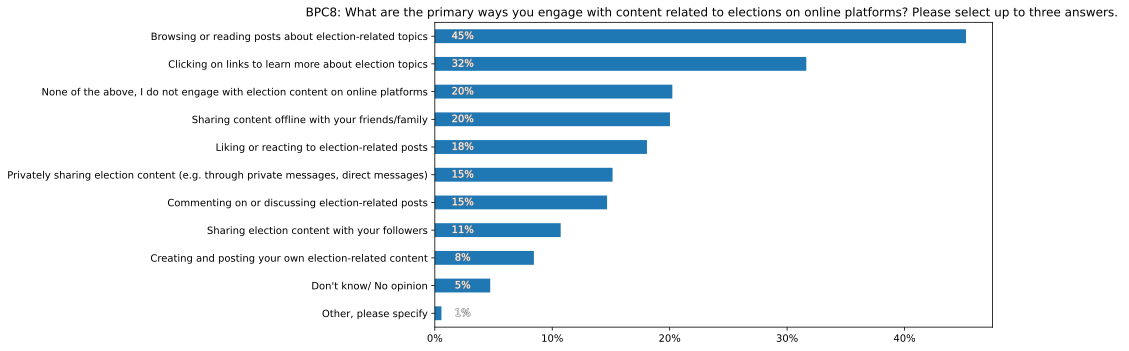

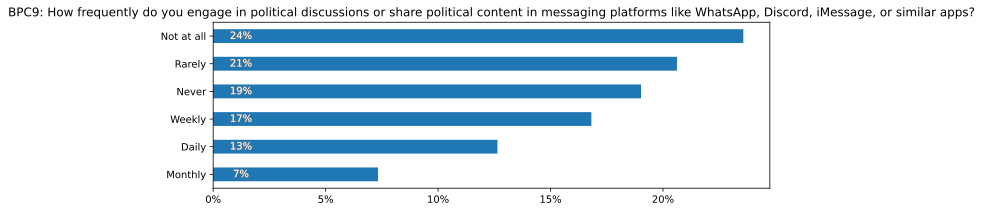

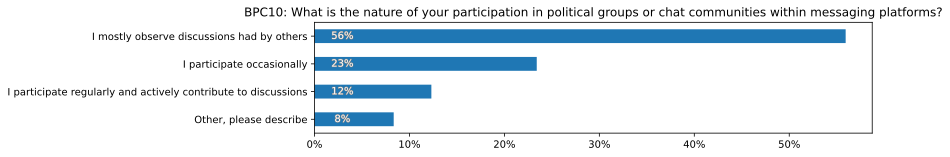

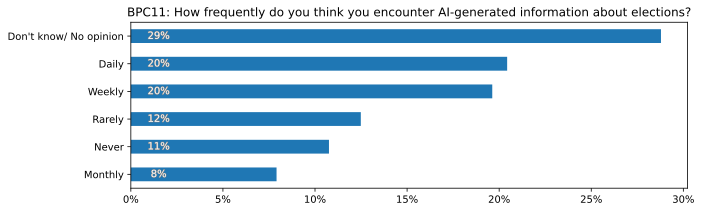

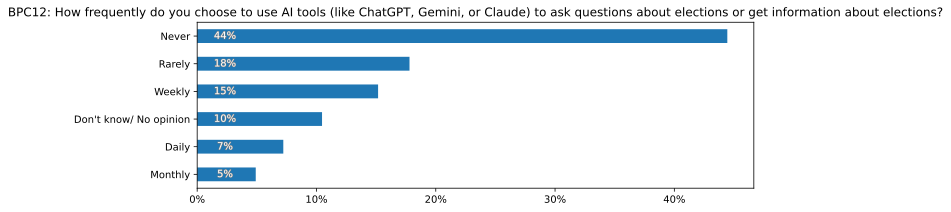

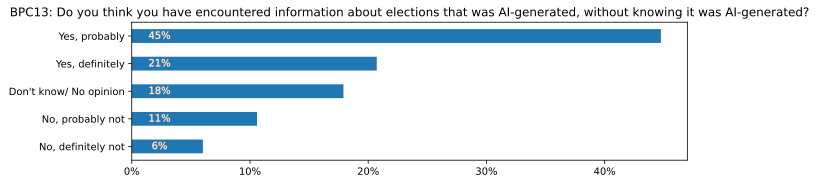

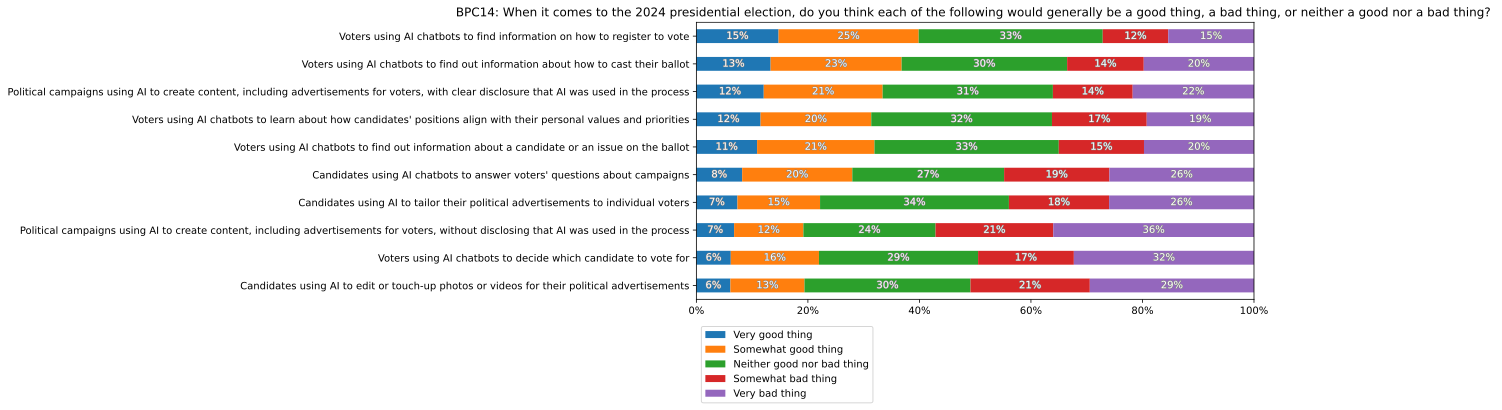

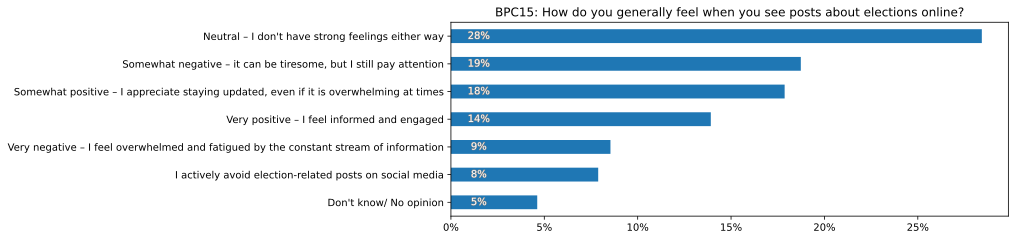

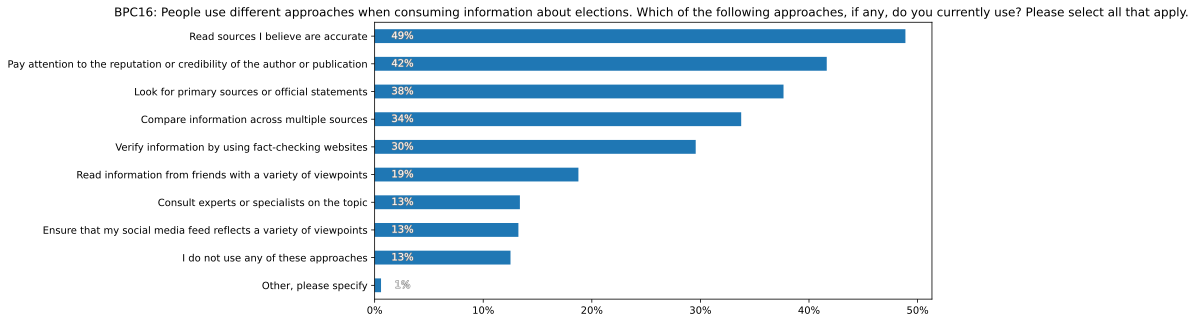

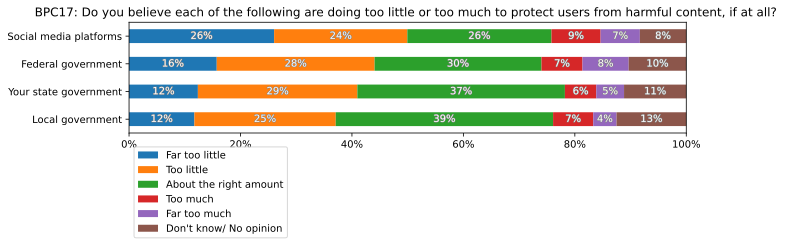

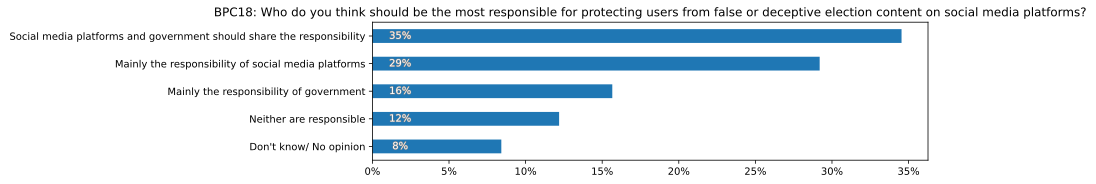

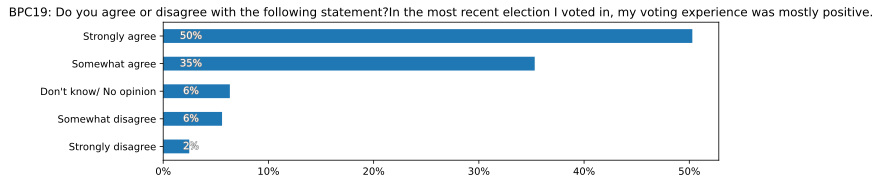

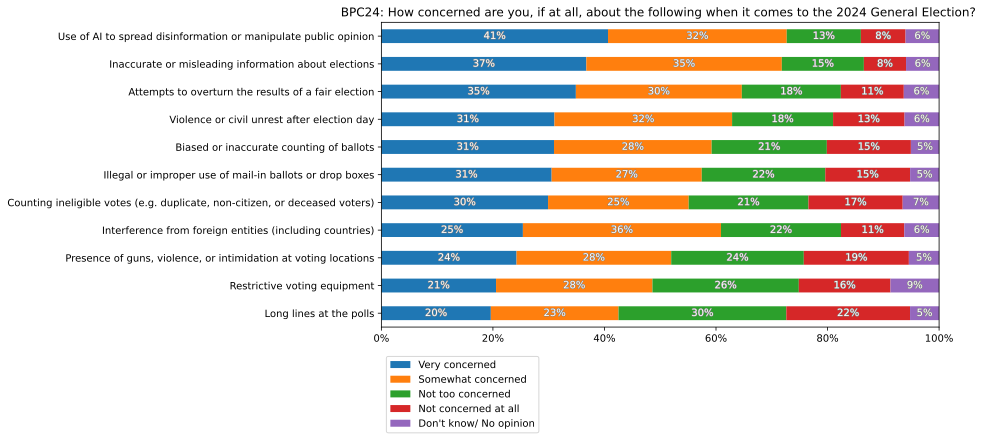

In [14]:
questions = [f"BPC{i}" for i in range(8, 20)] + ['BPC24']

for question in questions:
     df = mc_processor.run_and_display(data,codebook,q_codebook,question,survey_year,demo,suppress_output=False)


MISC - Figuring out conjoint issue

In [15]:
# # get columsn in data that start iwth "BPC6"
# data[data.filter(regex='^BPC6').columns]

In [16]:
# q_columns = data.filter(regex='^'+question+"_").columns

# data_type_check(data,q_columns)

# data.filter(regex='^' + question + r'[a-z]$').columns

# dot plot in progress

In [17]:
feelings23 = pd.read_csv("2023/feelings.csv",index_col=0)
feelings23.index = [i.replace("it's", "it is").replace("/n", "/ N").replace("Somewhat negative– It","Somewhat negative – it") for i in feelings23.index]
feelings23.columns = ["2023"]
feelings = mc_processor.run_and_display(data,codebook,q_codebook,"BPC15",survey_year,demo,suppress_output=True)
feelings = pd.concat([feelings23,feelings],axis=1)

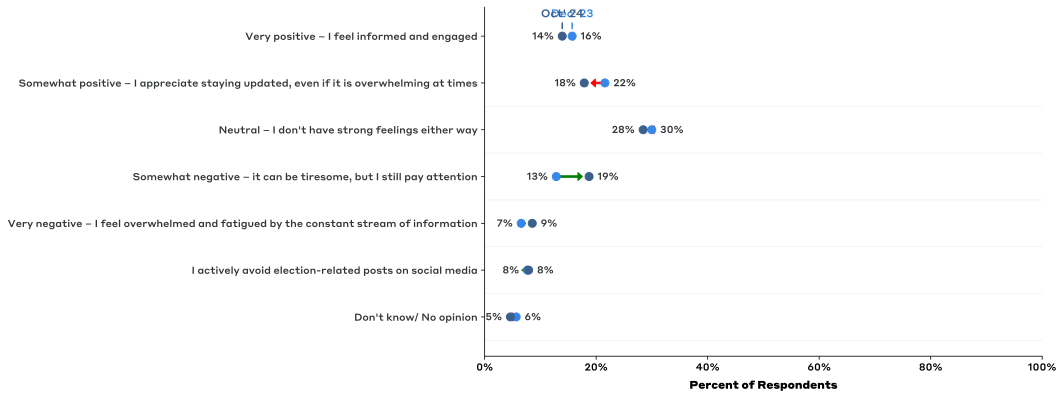

In [18]:
visualizing.dotplot(feelings,"feelings",start_tick_title="Dec' 23",end_tick_title="Oct' 24",xlabel="Percent of Respondents")

## stopped working on this one -- adjusting axes messes up other formatting, needs some more attention
# don't think it's the best visual anyways -- want to consider something different

ValueError: Length mismatch: Expected axis has 16 elements, new values have 4 elements